## Assignment on multilinear Regression_Toyota_Corolla_data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
#Load Data
toyota = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [3]:
toyota.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

### EDA and Data visualization

In [4]:
toyota.shape

(1436, 38)

In [5]:
toyota.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [6]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
toyota1 = pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)

In [8]:
toyota1

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [9]:
toyota2 = toyota1.rename({'Age_08_04':'Age','cc':'CC'},axis=1)

In [10]:
toyota2

Price  Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1431   7500   69  20544   86  1300      3      5             69    1025
1432  10845   72  19000   86  1300      3      5             69    1015
1433   8500   71  17016   86  1300      3      5             69    1015
1434   7250   70  16916   86  1300      3      5             69    1015
1435   6950   76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [11]:
#Duplicate values
toyota2[toyota2.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
113  24950    8  13253  116  2000      5      5            234    1320

In [12]:
toyota3 = toyota2.drop_duplicates().reset_index(drop=True)
toyota3

Price  Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1430   7500   69  20544   86  1300      3      5             69    1025
1431  10845   72  19000   86  1300      3      5             69    1015
1432   8500   71  17016   86  1300      3      5             69    1015
1433   7250   70  16916   86  1300      3      5             69    1015
1434   6950   76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [13]:
toyota3.describe()

Price          Age             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears  Quarterly_Tax       Weight  
count  1435.000000  1435.000000    1435.000000  1435.000000  
mean      4.032753     5.026481      87.020209  1072.287108  
std       0.952667     0.188575      40.959588    52.251882  
min       2.000000     3.000000      19.000000  1000.000000  
25%       3.000000     5.000000      69.000000  1040.000000  
50%       4.000000     5.000000      85.000000  1070.000000  
75%       5.000000     5.000000      85.000000  1085.000000  
max       5.000000     6.000000     283.000000  1615.000000

### Correlation Analysis

In [15]:
toyota3.corr()

Price       Age        KM        HP        CC     Doors  \
Price          1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604   
Age           -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929   
KM            -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193   
HP             0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803   
CC             0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254   
Doors          0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000   
Gears          0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101   
Quarterly_Tax  0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353   
Weight         0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734   

                  Gears  Quarterly_Tax    Weight  
Price          0.063831       0.211508  0.575869  
Age           -0.005629      -0.193319 -0.466484  
KM             0.014890       0.283312 -0.023969  
HP             0.209642      -0.302287  0.087143  
CC             0.014732       0.305982  0.335077  
Doors         -0.160101       0.107353  0.301734  
Gears          1.000000      -0.005125  0.021238  
Quarterly_Tax -0.005125       1.000000  0.621988  
Weight         0.021238       0.621988  1.000000

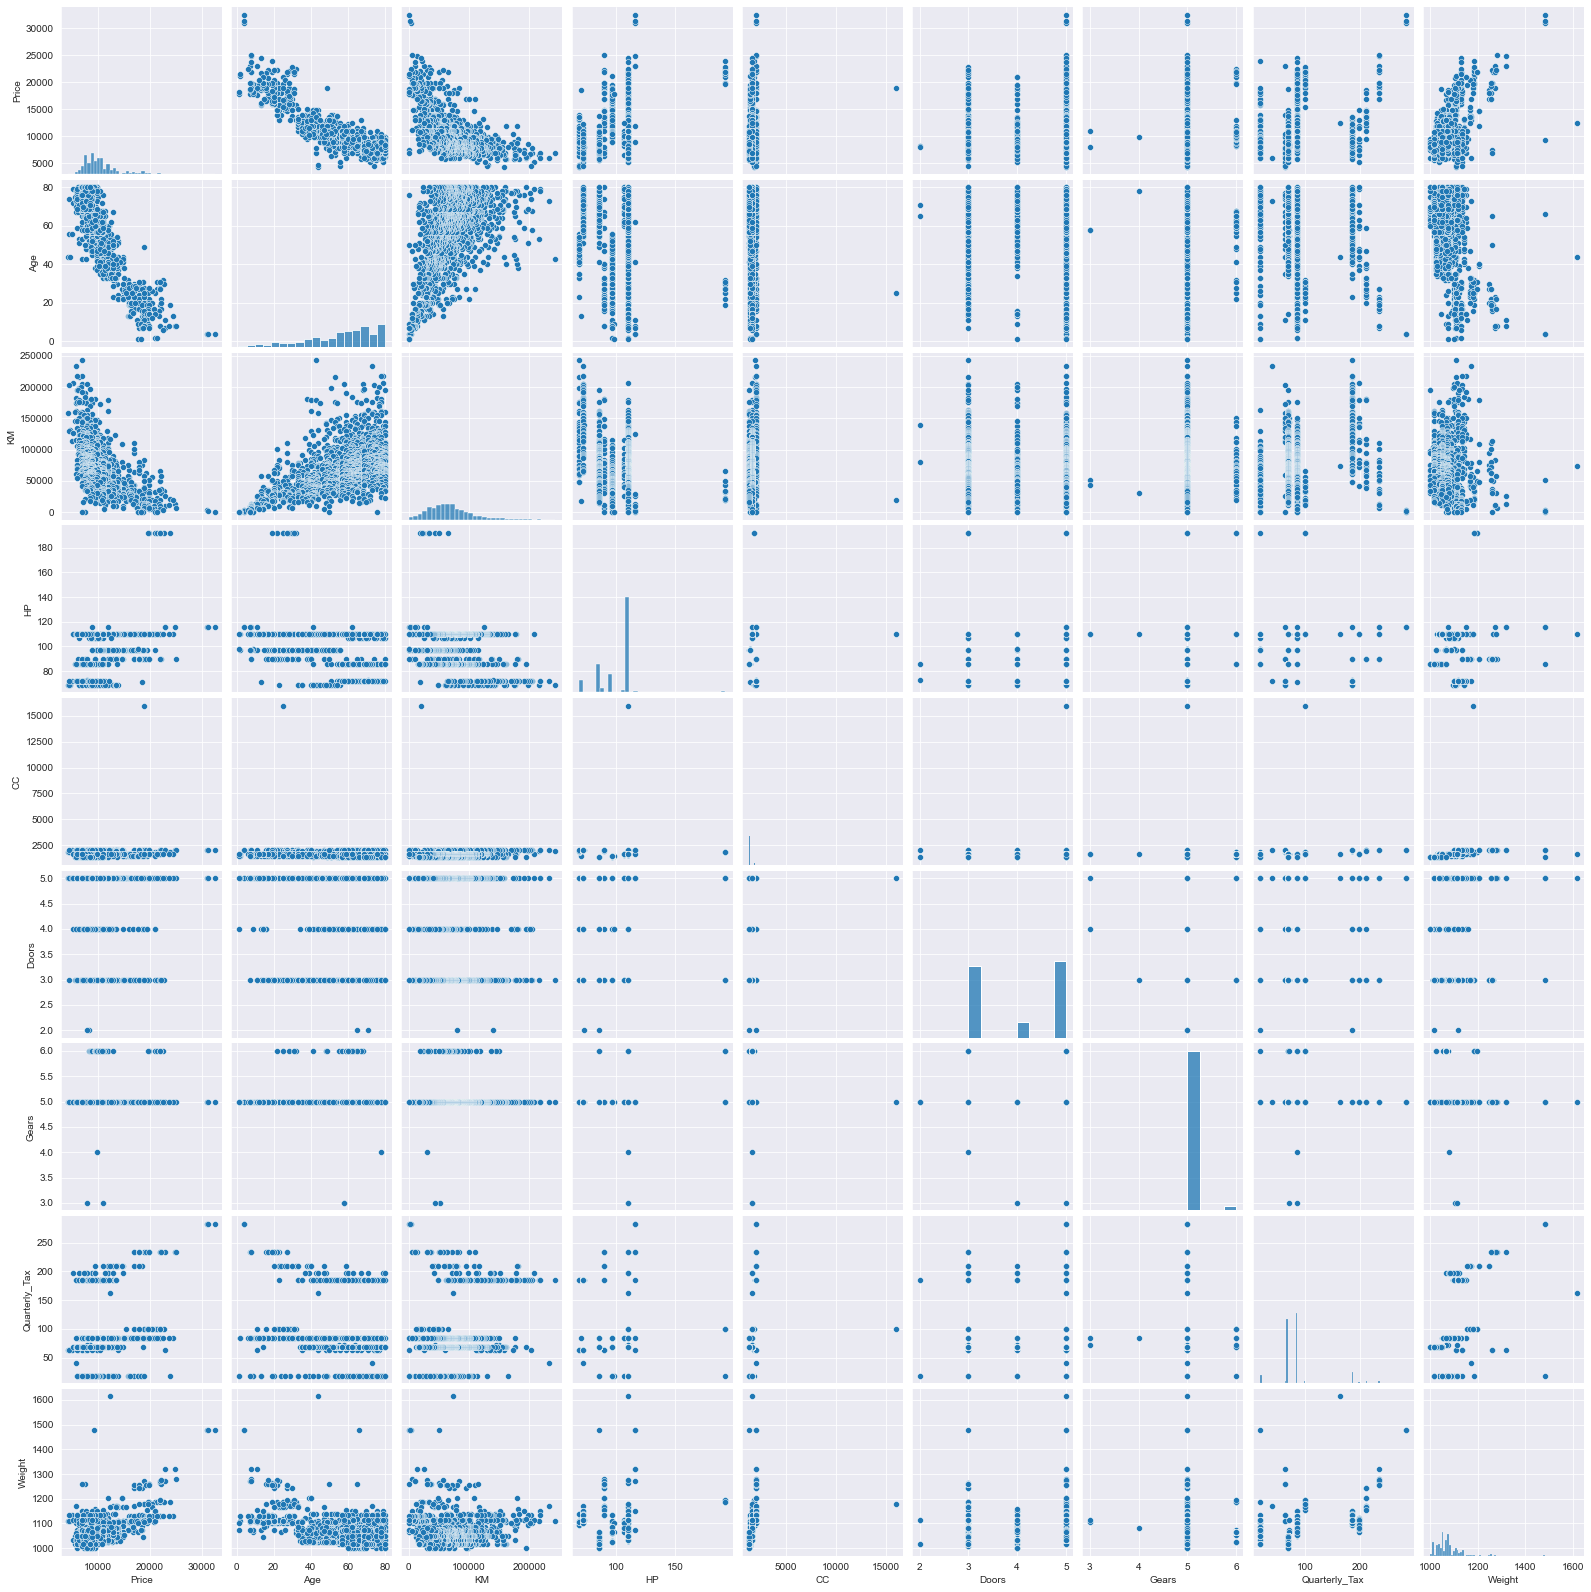

In [67]:
#pairplot
sns.set_style(style='darkgrid')
sns.pairplot(toyota3)

### Model building

In [17]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data=toyota3).fit()

### Model testing

In [68]:
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
CC                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [19]:
#Checking tvalues and pvalues
model.tvalues, np.round(model.pvalues, 5)

(Intercept        -3.875273
 Age             -46.551876
 KM              -16.552424
 HP               11.209719
 CC               -1.316436
 Doors            -0.023012
 Gears             3.034563
 Quarterly_Tax     2.944198
 Weight           15.760663
 dtype: float64,
 Intercept        0.00011
 Age              0.00000
 KM               0.00000
 HP               0.00000
 CC               0.18824
 Doors            0.98164
 Gears            0.00245
 Quarterly_Tax    0.00329
 Weight           0.00000
 dtype: float64)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:40:23   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
CC               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#Build SLR and MLR models for insignificant variables

In [22]:
model_c = smf.ols('Price~CC',data=toyota3).fit()
model_c.tvalues,model_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [23]:
model_d = smf.ols('Price~Doors', data=toyota3).fit()
model_d.tvalues,model_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [24]:
model_cd = smf.ols('Price~CC+Doors', data=toyota3).fit()
model_cd.tvalues,model_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

### Model Validation Techniques

In [25]:
#Calculating VIF
#Checking Collinearity problem

In [26]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota3).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota3).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+Quarterly_Tax+Weight',data=toyota3).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+Quarterly_Tax+Weight',data=toyota3).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota3).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax',data=toyota3).fit().rsquared
vif_WT=1/(1-rsq_WT)


In [27]:
#Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_Quarterly_Tax,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

Variables       Vif
0            Age  1.876236
1             KM  1.757178
2             HP  1.419180
3             CC  1.163470
4          Doors  1.155890
5          Gears  1.098843
6  Quarterly_Tax  2.295375
7         Weight  2.487180

In [28]:
#All variables have VIF less than 20 therefore no multicollinerity in variables
#so we will consider all the variables in model building

In [29]:
#Residual Analysis
#Test for Normality of Residuals (Q-Q plot)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


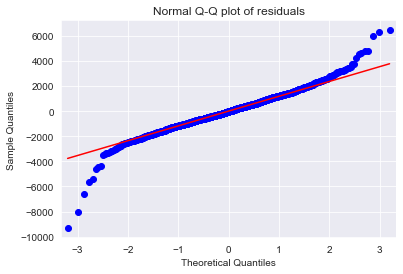

In [30]:
sm.qqplot(model.resid,line='q')        # 'q' - A line is fit through the quartiles 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [32]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [69]:
#Residual plot for Homoscedasticity

In [34]:
def standard_values(vals):
    return (vals-vals.mean())/vals.std()

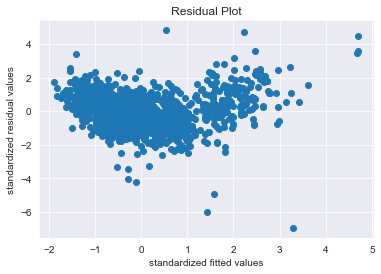

In [35]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [36]:
#Test for errors
#using residual regression plot code
#graphics.plot_regress_exog(model,'x',fig)
#exog = x variable and endog = y variable

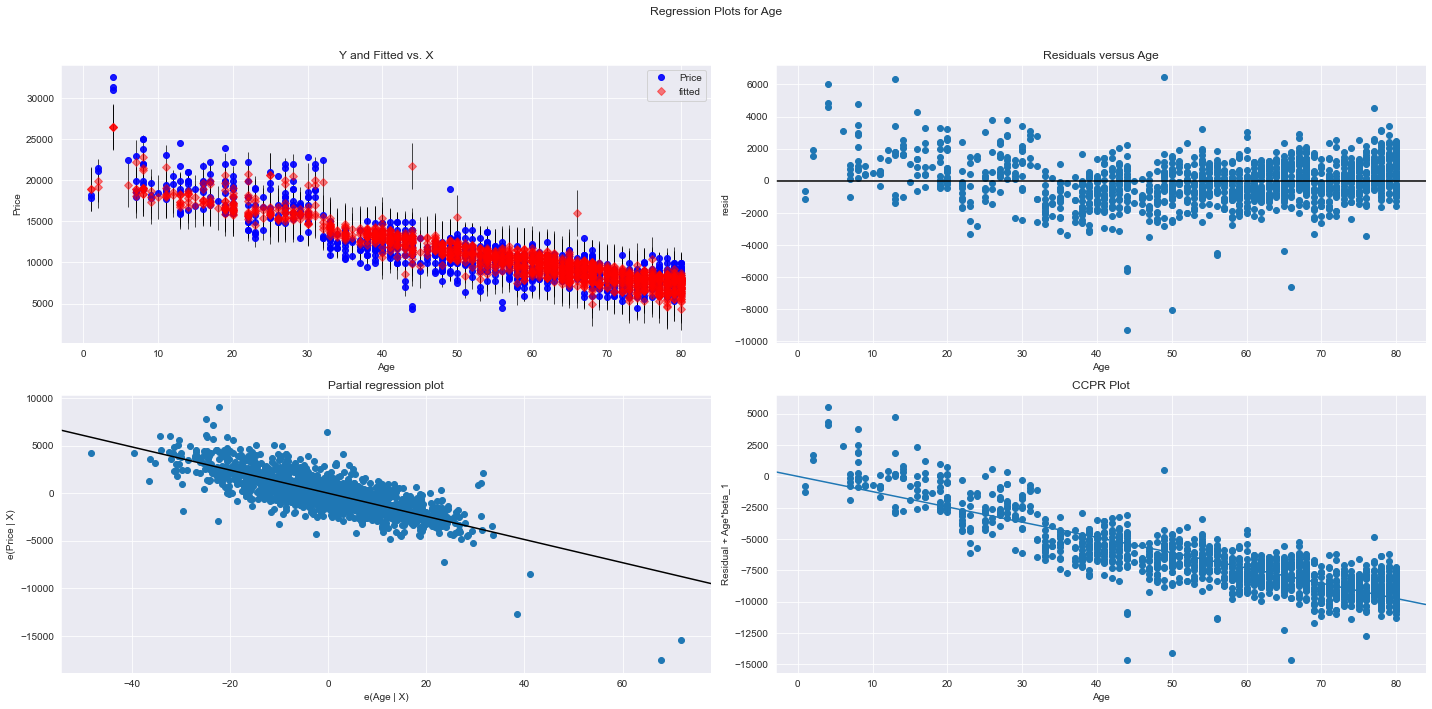

In [37]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

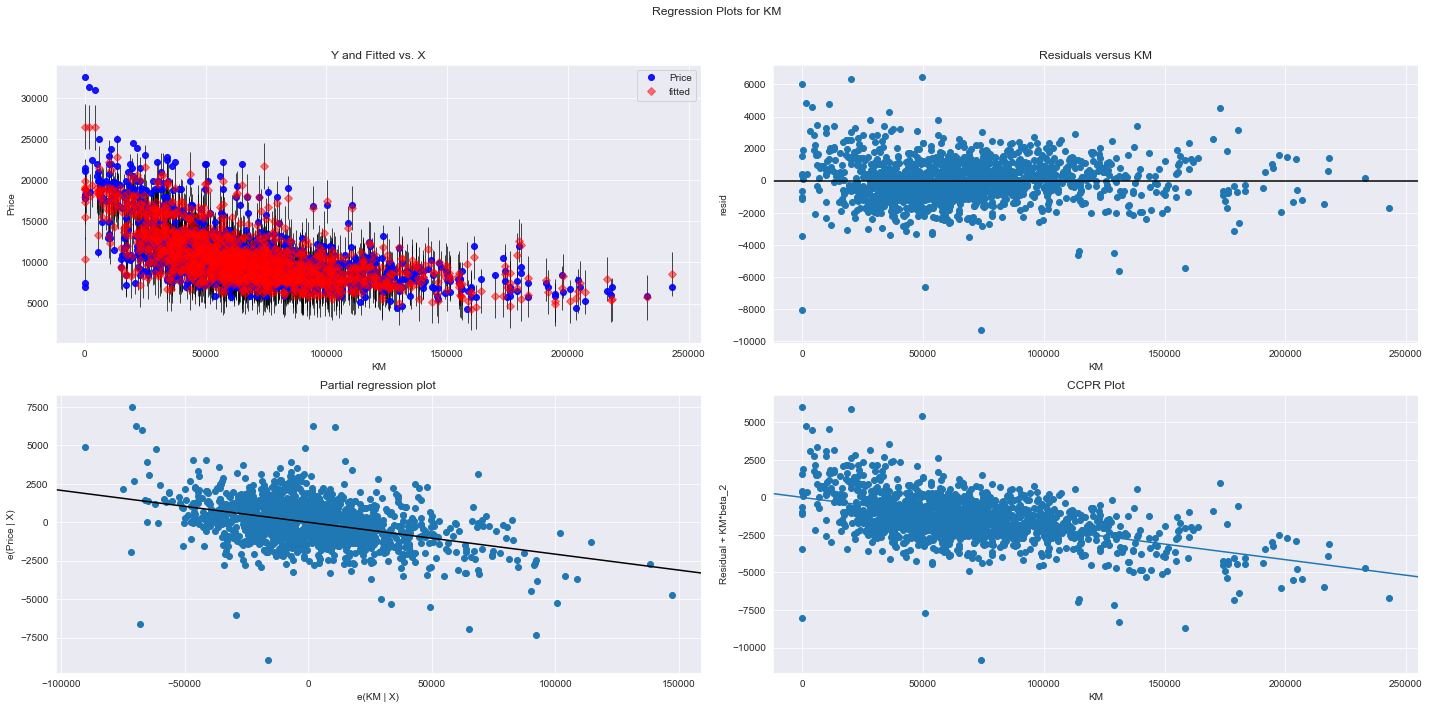

In [38]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

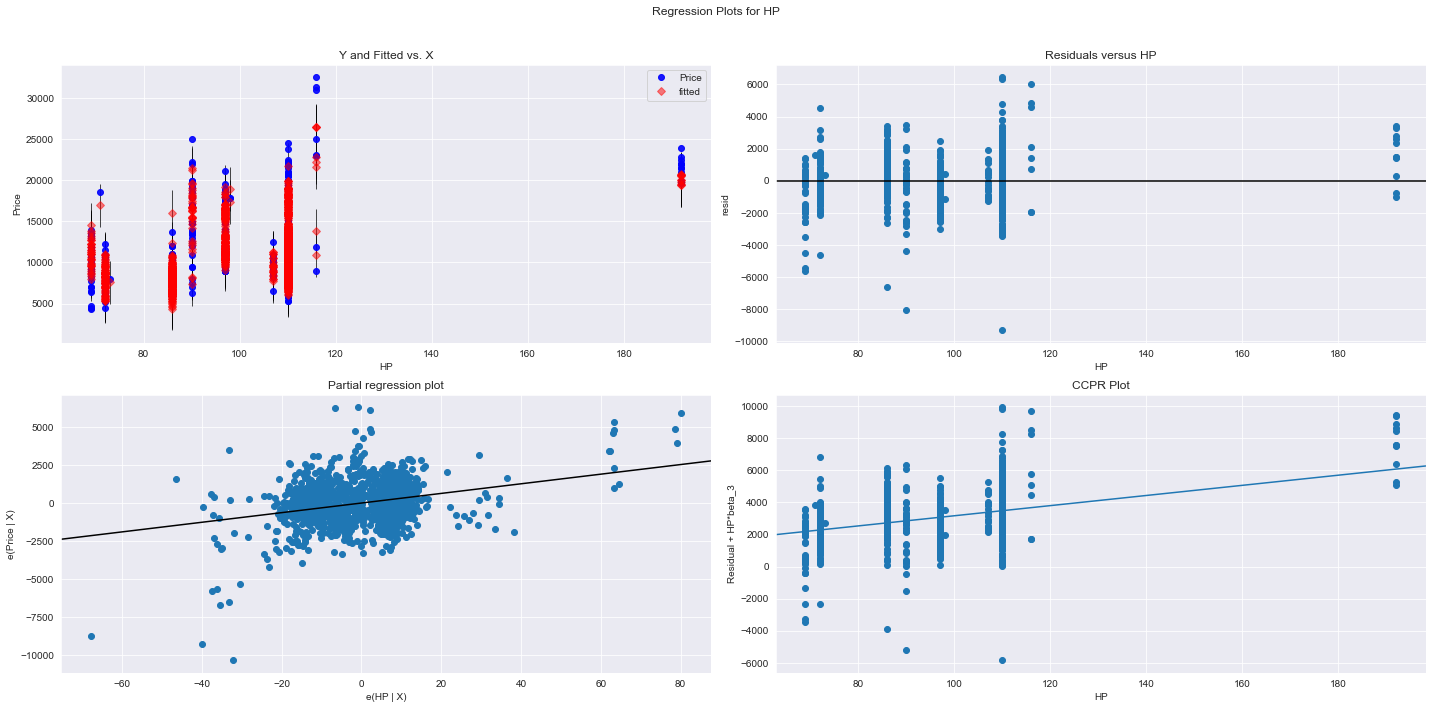

In [39]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

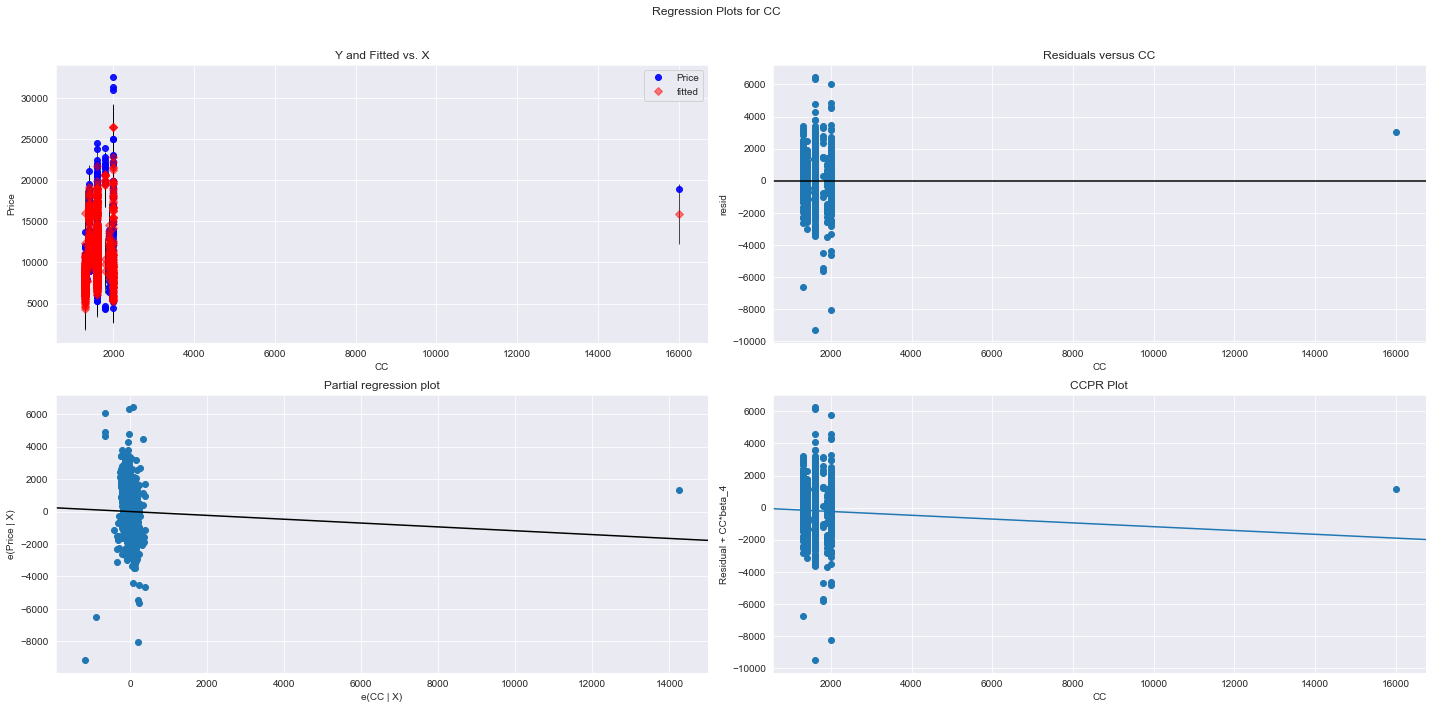

In [40]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"CC",fig=fig)
plt.show()

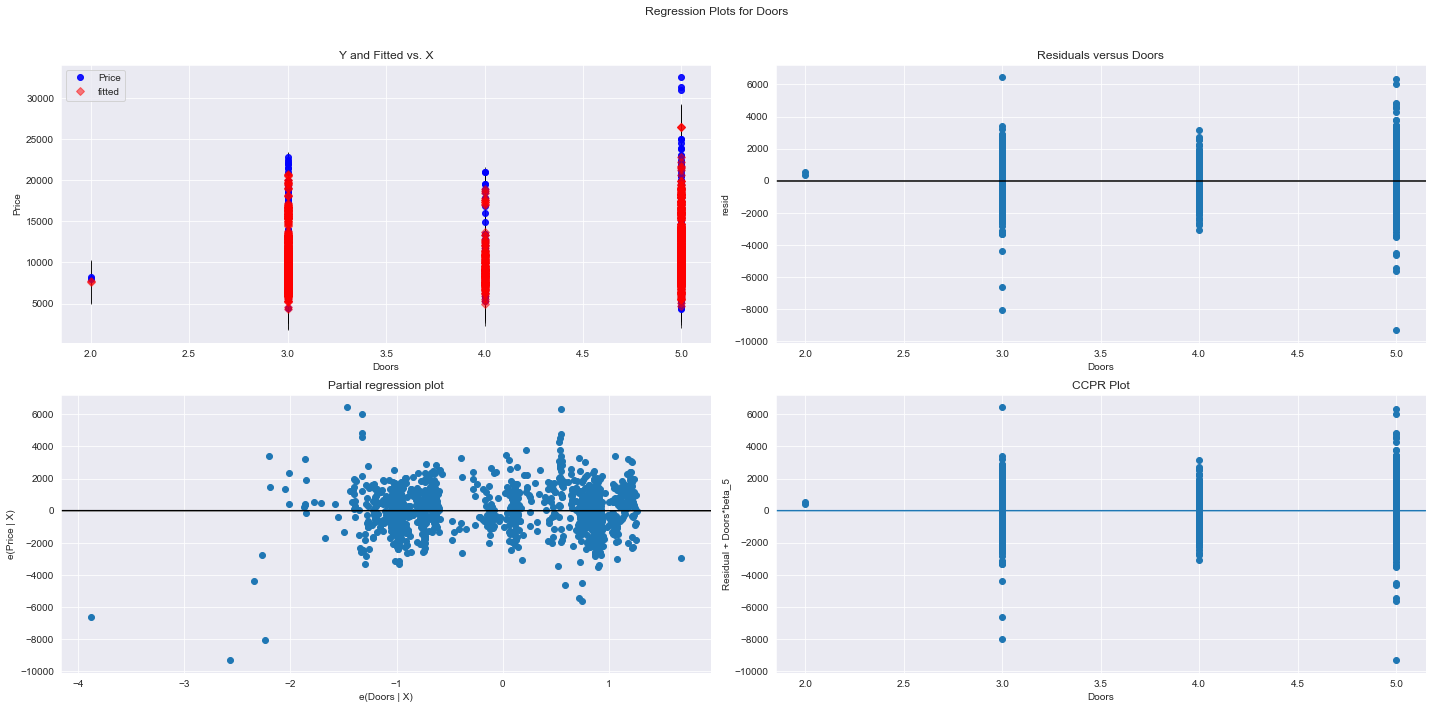

In [41]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

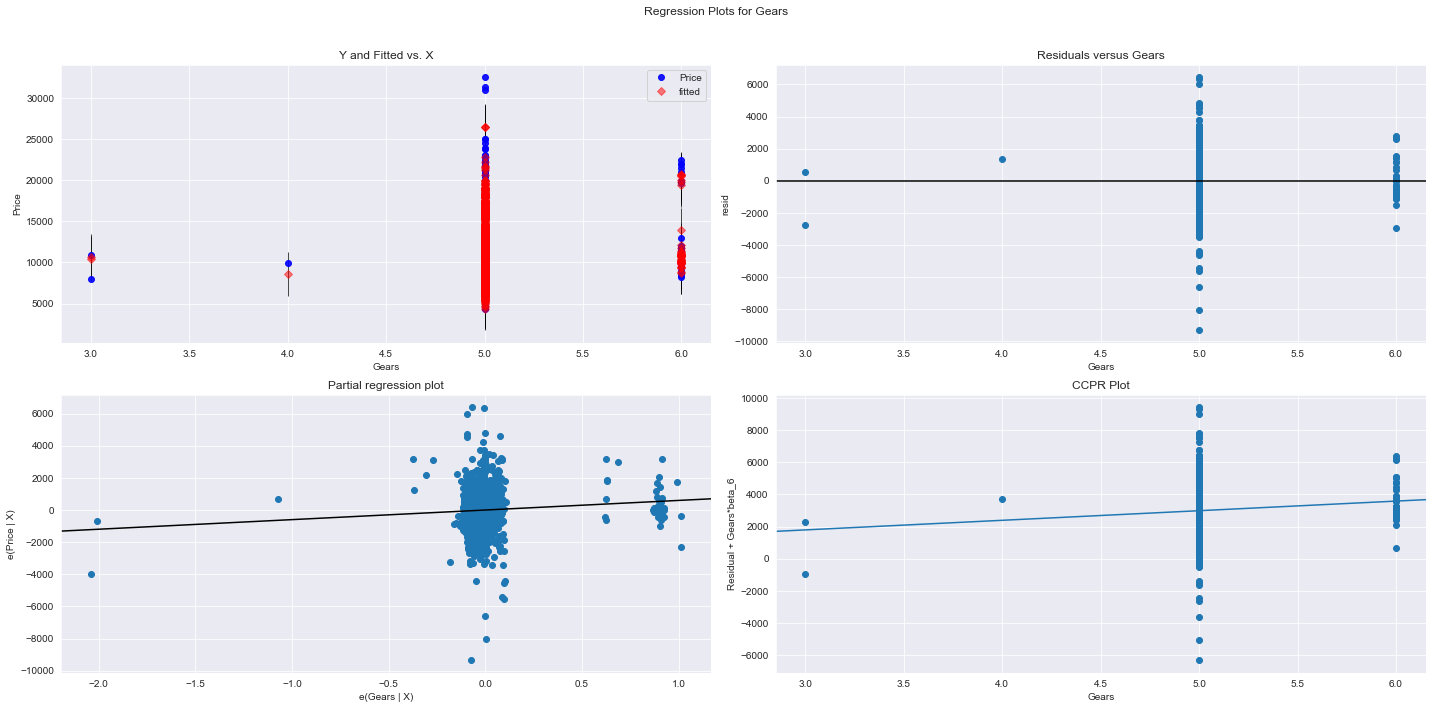

In [42]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

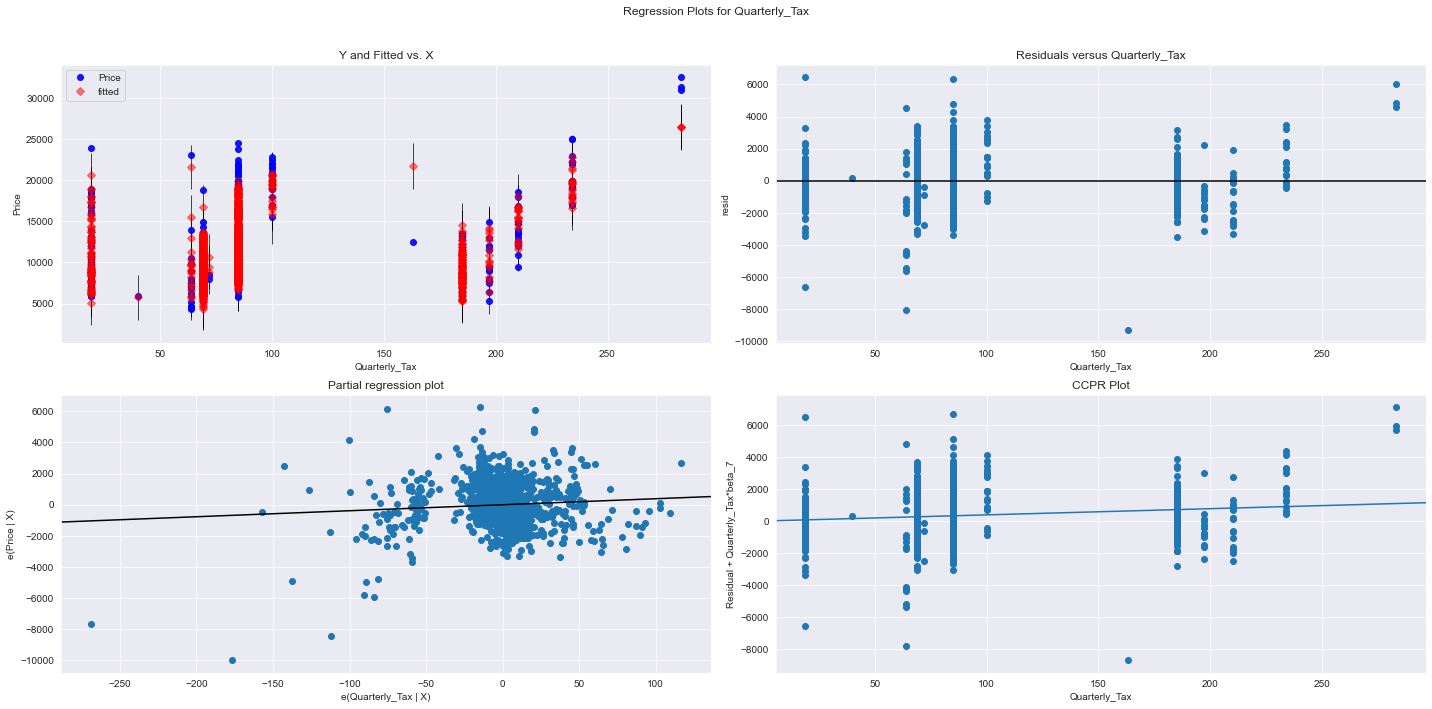

In [43]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

### Model Deletion Techniques

In [44]:
#Detecting outliers/influencers
#Cook's distance

In [45]:
#Get influencers using cooks distance
model.influence = model.get_influence()
(c, _) = model.get_influence().cooks_distance

In [46]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

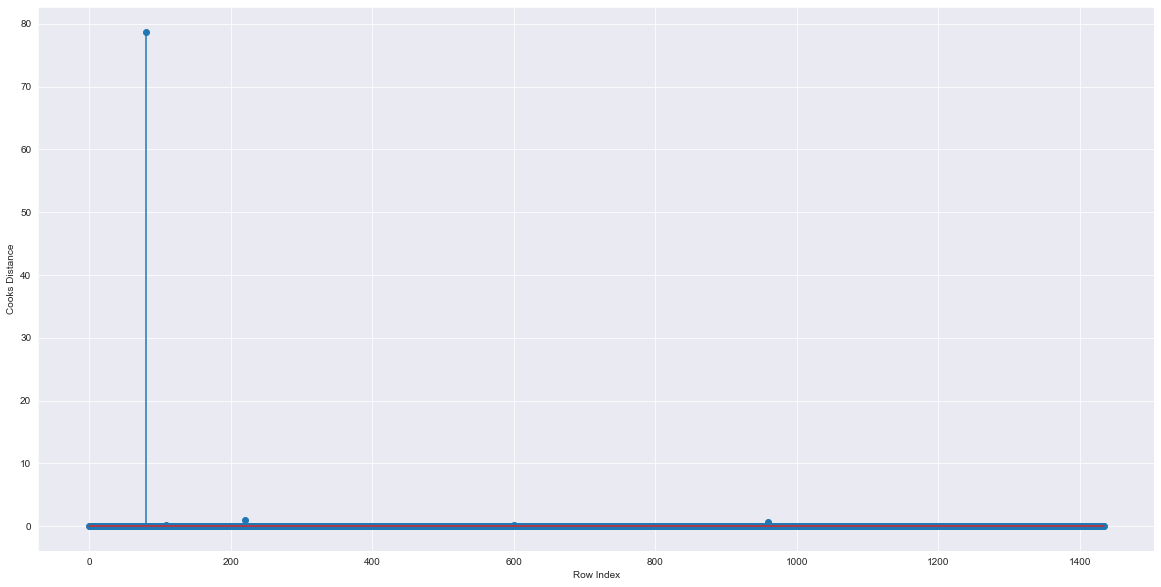

In [47]:
#plot cooks distance plot
fig=plt.figure(figsize=(20,10))
plt.stem(np.arange(len(toyota3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
np.argmax(c), np.max(c)

(80, 78.7295058224984)

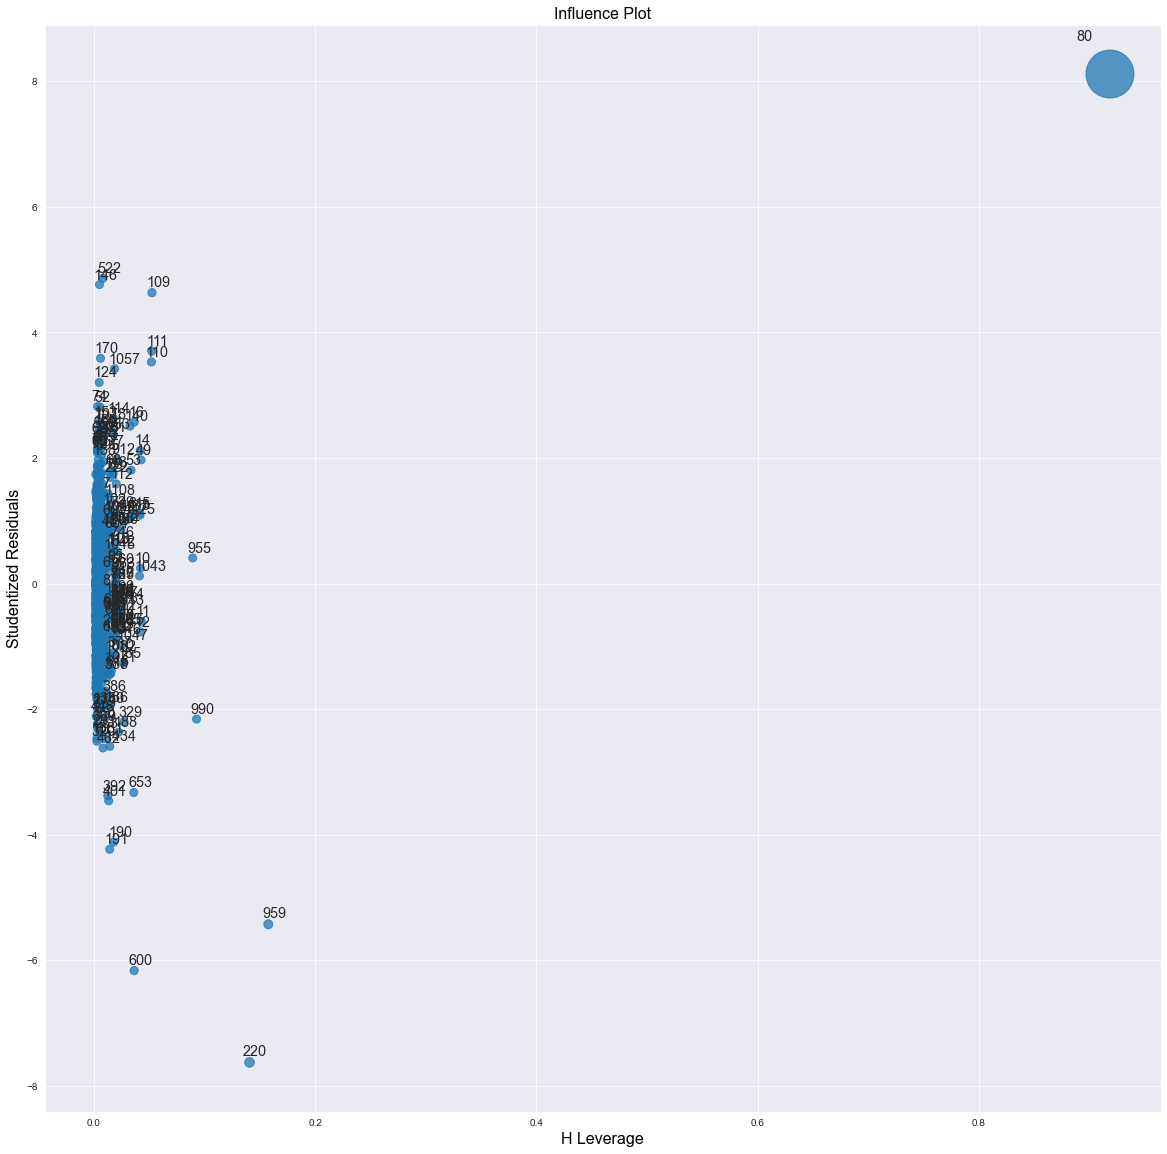

In [49]:
#Influence plot
from statsmodels.graphics.regressionplots import influence_plot
fig,ax = plt.subplots(figsize=(20,20))
fig = influence_plot(model,ax = ax)

In [50]:
#Leverage Cutoff

k = toyota3.shape[1]
n = toyota3.shape[0]
leverage_cutoff = 3*(k+1)/n

In [51]:
leverage_cutoff

0.020905923344947737

In [52]:
toyota3[toyota3.index.isin([80])]

Price  Age     KM   HP     CC  Doors  Gears  Quarterly_Tax  Weight
80  18950   25  20019  110  16000      5      5            100    1180

### Improving model

In [54]:
toyota_new = toyota3.copy()
toyota_new

Price  Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1430   7500   69  20544   86  1300      3      5             69    1025
1431  10845   72  19000   86  1300      3      5             69    1015
1432   8500   71  17016   86  1300      3      5             69    1015
1433   7250   70  16916   86  1300      3      5             69    1015
1434   6950   76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [55]:
#droping data points which are outliers and reset index
toyota4 = toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota4

Price  Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1429   7500   69  20544   86  1300      3      5             69    1025
1430  10845   72  19000   86  1300      3      5             69    1015
1431   8500   71  17016   86  1300      3      5             69    1015
1432   7250   70  16916   86  1300      3      5             69    1015
1433   6950   76      1  110  1600      5      5             19    1114

[1434 rows x 9 columns]

### Build model

In [57]:
final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota4).fit()


In [59]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:40:30   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age            -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM               -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP               39.2245      2.912     13.470      0.000      33.512      44.937
CC               -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors           -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears           527.1292    192.832      2.734      0.006     148.864     905.395
Quarterly_Tax     8.9414      1.427      6.268      0.000       6.143      11.740
Weight           20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
final_model.rsquared

0.8681163912634055

In [61]:
#Rsquared value is improved

### Model Prediction

In [62]:
new_data = pd.DataFrame({'Age':[15,17,18],'KM':[50000,55000,60000],'HP':[70,75,75],'CC':[1400,1500,1500],'Doors':[3,5,5],'Gears':[6,6,6],'Quarterly_Tax':[75,75,75],'Weight':[1020,1020,1020]})

In [63]:
new_data

Age     KM  HP    CC  Doors  Gears  Quarterly_Tax  Weight
0   15  50000  70  1400      3      6             75    1020
1   17  55000  75  1500      5      6             75    1020
2   18  60000  75  1500      5      6             75    1020

In [64]:
final_model.predict(new_data)

0    14555.709044
1    14117.915432
2    13908.411493
dtype: float64

In [65]:
pred_y = final_model.predict(toyota4)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64